In [1]:
# importing necessary libraries

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

C:\Users\MOHAN KUMAR SAH\.conda\envs\python3.5\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load mnist data and split into train and test sets

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# printing the dimenstions
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


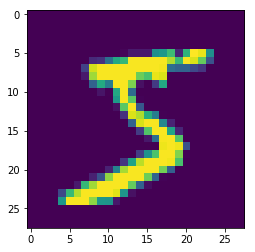

In [3]:
# plot the first image in the dataset
plt.imshow(x_train[0])

In [4]:
#check image shape
x_train[0].shape

(28, 28)

In [5]:
# reshape data to fit model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [6]:
# observing the third value in the y_train
y_train[2]

4

In [7]:
# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# observing the one-hot encoding of third value in the y_train
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
# create model
model = Sequential()

# Add model layers

# Layer 1 
# Convolutional Layer
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))

# Pooling Layer
# We are using Max pooling
model.add(MaxPooling2D((2, 2)))

# Layer 2
# Covoultinal Layer
model.add(Conv2D(32, kernel_size=3, activation='relu'))

# Pooling Layer
# We are using Max pooling
model.add(MaxPooling2D((2, 2)))

# Flattening the output of layer 2 
model.add(Flatten())

# Output Layer
# Dense layer
model.add(Dense(10, activation='softmax'))

1. The model type that we will be using is Sequential. Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer.
2. The ‘add()’ function is to add layers to our model.
3. These are convolution layers that will deal with our input images, which are seen as 2-dimensional matrices. Add as many convolutinal layers until staisfied.
4. 64 in the first layer and 32 in the second layer are the number of nodes in each layer. This number can be adjusted to be higher or lower, depending on the size of the dataset.
5. Kernel size is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix.
6. Activation is the activation function for the layer. The activation function we will be using for our first 2 layers is the ReLU, or Rectified Linear Activation. 
7. In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. Flatten serves as a connection between the convolution and dense layers.
8. ‘Dense’ is the layer type we will use in for our output layer. Dense is a standard layer type that is used in many cases for neural networks.
9. We will have 10 nodes in our output layer, one for each possible outcome (0–9).
10. The activation is ‘softmax’. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities.The model will then make its prediction based on which option has the highest probability.

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 27,114
Trainable params: 27,114
Non-trainable params: 0
_________________________________________________________________


The summary is textual and includes information about:

1. The layers and their order in the model.
2. The output shape of each layer.
3. The number of parameters (weights) in each layer.
4. The total number of parameters (weights) in the model.

Next, we need to compile our model. Compiling the model takes three parameters: optimizer, loss and metrics.

In [10]:
# Compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

1. The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.
2. The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.
3. ‘categorical_crossentropy’ is used for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.
4. ‘accuracy’ metric  is used to see the accuracy score on the validation set when we train the model.

In [11]:
#train model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 148s 2ms/step - loss: 5.5121 - acc: 0.6374 - val_loss: 0.0883 - val_acc: 0.9738
Epoch 2/3
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0774 - acc: 0.9765 - val_loss: 0.0626 - val_acc: 0.9820
Epoch 3/3
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0580 - acc: 0.9829 - val_loss: 0.0568 - val_acc: 0.9831


To train, we will use the ‘fit()’ function on our model with the following parameters: training data (x_train), target data (y_train), validation data, and the number of epochs.

1. x_train: The training data consisting of only the independent factors
2. y_train: The training data consisting of only the dependent factors
3. validation_data: For our validation data, we will use the test set provided to us in our dataset, which we have split into x_test and y_test.
4. epochs: one epoch stands for one complete training of the neural network with all samples.

In [12]:
# Observing predictions for the first 3 images in the test set
preds=model.predict(x_test[:4])
preds

array([[3.43303511e-13, 1.59052285e-12, 7.50071720e-08, 5.57709079e-08,
        1.62287623e-13, 8.41073322e-11, 4.00479401e-16, 9.99999523e-01,
        1.39075480e-08, 3.22844528e-07],
       [3.16314530e-09, 1.56293981e-06, 9.99998331e-01, 1.43289758e-09,
        3.29917227e-09, 4.81324643e-14, 7.78726914e-08, 3.25795934e-15,
        4.29942665e-10, 1.57295357e-12],
       [1.66921801e-08, 9.99648809e-01, 1.34931520e-06, 4.32910412e-07,
        3.15346202e-04, 6.19498124e-08, 4.88529338e-07, 3.24889106e-06,
        2.99343701e-05, 3.75380182e-07],
       [9.99990344e-01, 2.49662270e-13, 1.58150577e-08, 1.69406433e-10,
        2.61728195e-09, 5.74710279e-10, 9.13567874e-06, 1.42809636e-11,
        6.18484037e-08, 3.95100187e-07]], dtype=float32)

For seeing the predictions that our model has made for the test data, we can use the predict function. The predict function will give an array with 10 numbers. These numbers are the probabilities that the input image represents each digit (0–9). The array index with the highest number represents the model prediction.

In [13]:
# For getting tha index with maximum value
np.argmax(preds, axis=-1)

array([7, 2, 1, 0], dtype=int64)

In [14]:
# show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
# For getting tha index with maximum value
np.argmax(y_test[:4], axis=-1)

array([7, 2, 1, 0], dtype=int64)

In [16]:
# Evaluating the performance on the test set

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ",test_loss.round(3),"\nAccu: ",test_acc.round(3))

10000/10000 [==============================] - 8s 778us/step
Loss:  0.057 
Accu:  0.983


# Visualize Model

In [17]:
model.layers

In [18]:
# Printing the name of the layers
for layer in model.layers:
    print(layer.name, layer.trainable)

conv2d_1 True
max_pooling2d_1 True
conv2d_2 True
max_pooling2d_2 True
flatten_1 True
dense_1 True


In [19]:
for layer in model.layers:
    print('Layer Configuration:')
    print(layer.get_config(),"\n","------"*20)

Layer Configuration:
{'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'seed': None, 'mode': 'fan_avg', 'distribution': 'uniform', 'scale': 1.0}}, 'activation': 'relu', 'padding': 'valid', 'batch_input_shape': (None, 28, 28, 1), 'strides': (1, 1), 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'activity_regularizer': None, 'bias_constraint': None, 'bias_regularizer': None, 'dtype': 'float32', 'trainable': True, 'dilation_rate': (1, 1), 'kernel_constraint': None, 'kernel_size': (3, 3), 'name': 'conv2d_1', 'data_format': 'channels_last', 'filters': 64, 'kernel_regularizer': None, 'use_bias': True} 
 ------------------------------------------------------------------------------------------------------------------------
Layer Configuration:
{'trainable': True, 'strides': (2, 2), 'pool_size': (2, 2), 'name': 'max_pooling2d_1', 'padding': 'valid', 'data_format': 'channels_last'} 
 ----------------------------------------------------------------------------------

The weights of each layer can be obtained using

In [20]:
for i in range(len(model.layers)):
    print("For Layer ",model.layers[i].name," weights are")
    print(model.layers[i].get_weights())
    print()
    print("----"*30)

For Layer  conv2d_1  weights are
[array([[[[-0.07117332, -0.11871236, -0.02792738, -0.02604584,
          -0.12552024,  0.06599326, -0.0009745 , -0.10929321,
          -0.00706674,  0.05502931, -0.08452702, -0.04653251,
          -0.0949929 , -0.11232311,  0.00024684,  0.00849208,
          -0.00574883, -0.0736568 ,  0.01780812, -0.00077945,
          -0.07600698, -0.07713334, -0.01890288, -0.12654534,
          -0.00616101, -0.09747548, -0.01090491, -0.02375196,
           0.03713597, -0.07474131, -0.00866111, -0.00204889,
          -0.00632484,  0.03857862, -0.05244157,  0.01286643,
          -0.0185243 , -0.04976959, -0.08375214, -0.11644132,
          -0.03624744, -0.04530561, -0.07460491, -0.0014205 ,
          -0.13252297, -0.02572778, -0.03993769,  0.02834358,
          -0.10054269, -0.08127081,  0.00123064, -0.0067372 ,
           0.02846469, -0.05443987,  0.02492472, -0.00435449,
          -0.0030198 , -0.07127823, -0.02900791, -0.09636054,
           0.0123684 , -0.16246228, 

Keras also provides a function to create a plot of the network neural network graph that can make more complex models easier to understand.

The plot_model() function in Keras will create a plot of your network. This function takes a few useful arguments:

1. model: (required) The model that you wish to plot.
2. to_file: (required) The name of the file to which to save the plot.
3. show_shapes: (optional, defaults to False) Whether or not to show the output shapes of each layer.
4. show_layer_names: (optional, defaults to True) Whether or not to show the name for each layer.

Example : plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

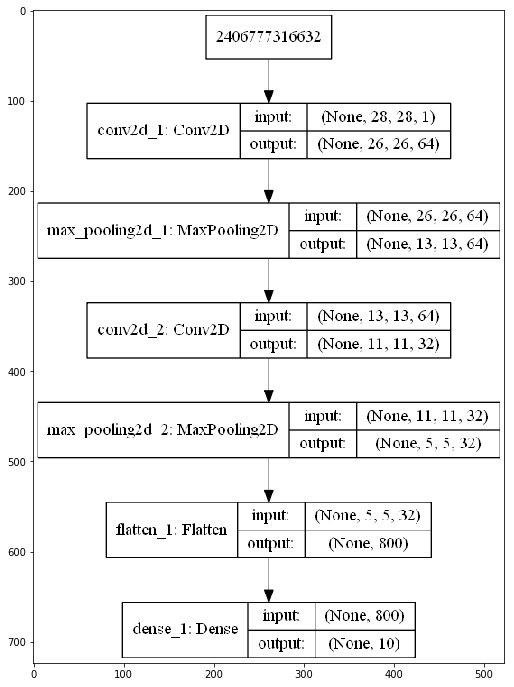

In [21]:
from keras.utils.vis_utils import plot_model
import pydot

plot_model(model, to_file='DigitRecognitionWithANN.png', show_shapes=True, show_layer_names=True)

# Python program to read  
# image using matplotlib 
  
# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('DigitRecognitionWithANN.png') 

# increasing the size of image
plt.figure(figsize=(10,12))

# Output Images
plt.imshow(img)

# for deleting the png file
import os
try: 
    os.remove("DigitRecognitionWithANN.png")
except: 
    print("Not Removed")